In [12]:
import numpy as np

# Create a 2x2 chessboard
n_squares = 4
indices_of_squares = np.arange(n_squares).astype(np.uint64)
wheat_counts = 2**indices_of_squares

# Reshape to 2x2
chessboard_2x2 = wheat_counts.reshape(2, 2)
print("2x2 Chessboard with Wheat Counts:\n", chessboard_2x2)

2x2 Chessboard with Wheat Counts:
 [[1 2]
 [4 8]]


In [11]:
def create_chessboard(n, m):
    total_squares = n * m
    indices_of_squares = np.arange(total_squares).astype(np.uint64)
    wheat_counts = 2**indices_of_squares
    return wheat_counts.reshape(n, m)

# Example: 8x8 chessboard
chessboard_8x8 = create_chessboard(8, 8)
print("8x8 Chessboard with Wheat Counts:\n", chessboard_8x8)

8x8 Chessboard with Wheat Counts:
 [[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
      

Total Wheat Grains on 8x8 Chessboard: 18446744073709551615


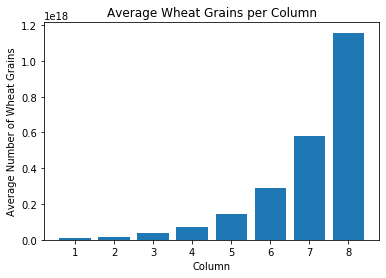

In [13]:
import matplotlib.pyplot as plt

# Total number of wheat grains
total_wheat = np.sum(chessboard_8x8)
print("Total Wheat Grains on 8x8 Chessboard:", total_wheat)

# Average number of wheat grains per column
column_averages = np.mean(chessboard_8x8, axis=0)

# Plotting
plt.xlabel("Column")
plt.ylabel("Average Number of Wheat Grains")
plt.title("Average Wheat Grains per Column")
plt.bar(np.arange(1, 9), column_averages)
plt.show()

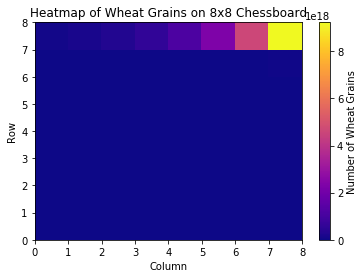

In [15]:
plt.xlabel("Column")
plt.ylabel("Row")
plt.title("Heatmap of Wheat Grains on 8x8 Chessboard")
plt.pcolor(chessboard_8x8, cmap="plasma")  
plt.colorbar(label="Number of Wheat Grains")
plt.show()

In [8]:
# Split the chessboard into first half (rows 0-3) and second half (rows 4-7)
first_half = chessboard_8x8[:4, :]
second_half = chessboard_8x8[4:, :]

# Total wheat in each half
total_first_half = np.sum(first_half)
total_second_half = np.sum(second_half)

# Ratio
ratio = total_second_half / total_first_half
print("Second Half is", ratio, "times larger than the First Half.")

Second Half is 4294967296.0 times larger than the First Half.


In [9]:
# Method 1: Using np.append()
def create_chessboard_append(n, m):
    total_squares = n * m
    wheat_counts = np.array([1], dtype=np.uint64)
    for _ in range(total_squares - 1):
        wheat_counts = np.append(wheat_counts, 2 * wheat_counts[-1])
    return wheat_counts.reshape(n, m)

# Method 2: Using broadcasting
def create_chessboard_broadcast(n, m):
    total_squares = n * m
    indices_of_squares = np.arange(total_squares).astype(np.uint64)
    wheat_counts = 2**indices_of_squares
    return wheat_counts.reshape(n, m)

# Test both methods
chessboard_append = create_chessboard_append(8, 8)
chessboard_broadcast = create_chessboard_broadcast(8, 8)

print("Using np.append():\n", chessboard_append)
print("Using Broadcasting:\n", chessboard_broadcast)

Using np.append():
 [[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584301e+18 4.61168602e

In [14]:
import timeit
import numpy as np

n_squares = 64

# Method 1: Python list and for loop
def method1():
    small_board_list = [1]
    for _ in range(n_squares - 1):
        small_board_list.append(2 * small_board_list[-1])

# Method 2: Using np.append()
def method2():
    small_board_ndarray = np.array([1], dtype=np.uint64)
    for _ in range(n_squares - 1):
        small_board_ndarray = np.append(small_board_ndarray, 2 * small_board_ndarray[-1])

# Method 3: Using broadcasting
def method3():
    indices_of_squares = np.arange(n_squares).astype(np.uint64)
    small_board_ndarray = 2**indices_of_squares

# Timing each method
print("Method 1:", timeit.timeit(method1, number=100))
print("Method 2:", timeit.timeit(method2, number=100))
print("Method 3:", timeit.timeit(method3, number=100))


Method 1: 0.0014959999999746287
Method 2: 0.03940189999997301
Method 3: 0.00033980000000610744
